In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://covid19.ncdc.gov.ng/'
vid_page = requests.get(url)
soup = BeautifulSoup(vid_page.text, 'lxml')
#print(soup)

df = pd.DataFrame(columns=({"States",
               "Confirmed Cases",
               "People on Admission",
               "Number Discharged",
               "Number of Deaths"}))

for tr in soup.find_all('tr')[1:]:
    tds = tr.find_all('td')
    new_data = {"States":tds[0].text.strip('\n').strip(','),"Confirmed Cases": int(tds[1].text.replace('\n','').replace(',','')),"People on Admission":int(tds[2].text.replace('\n','').replace(',','')), "Number Discharged":int(tds[3].text.replace('\n','').replace(',','')),"Number of Deaths":int(tds[4].text.replace('\n','').replace(',',''))}
    
    #print(new_data)
    df = df.append(new_data, ignore_index = True)
cf = df
cf.head()
#df.to_json(r'cov_nigeria.json', orient='index')

,States,Number Discharged,Confirmed Cases,People on Admission,Number of Deaths
0,Lagos,469,1845,1343,33
1,Kano,48,602,528,26
2,FCT,53,356,297,6
3,Borno,12,185,157,16
4,Bauchi,6,181,174,1


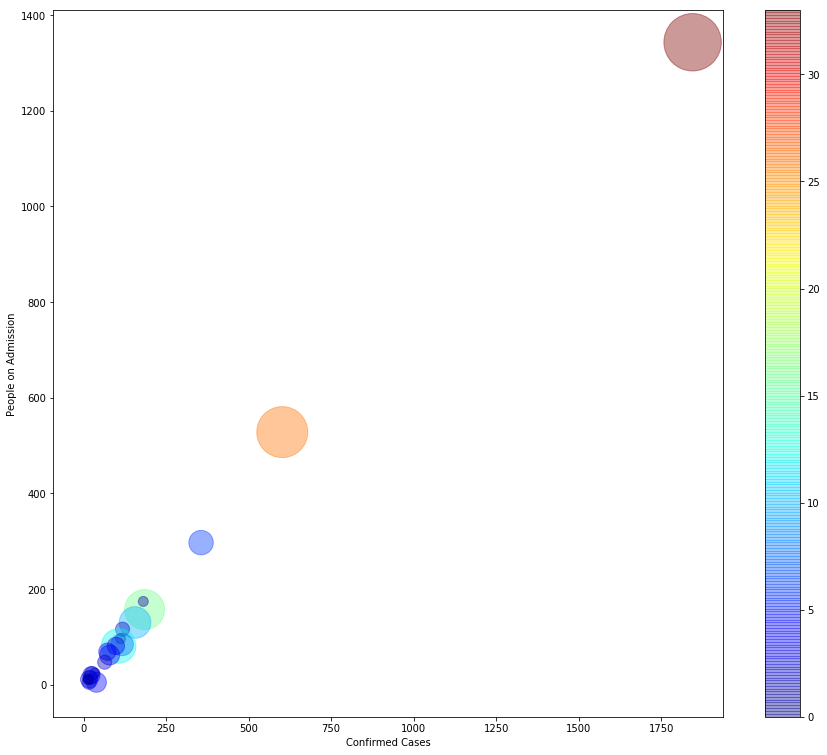

,States,Number Discharged,Confirmed Cases,People on Admission,Number of Deaths
0,Lagos,469,1845,1343,33
1,Kano,48,602,528,26
2,FCT,53,356,297,6
3,Borno,12,185,157,16
4,Bauchi,6,181,174,1


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

cf.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)

cf.plot(kind='scatter', x='Confirmed Cases', y='People on Admission', alpha=0.4, figsize=(15,13),s=cf['Number of Deaths']*100, c=cf['Number of Deaths'], cmap=plt.get_cmap('jet'), colorbar=True)

plt.show()

cf.head()

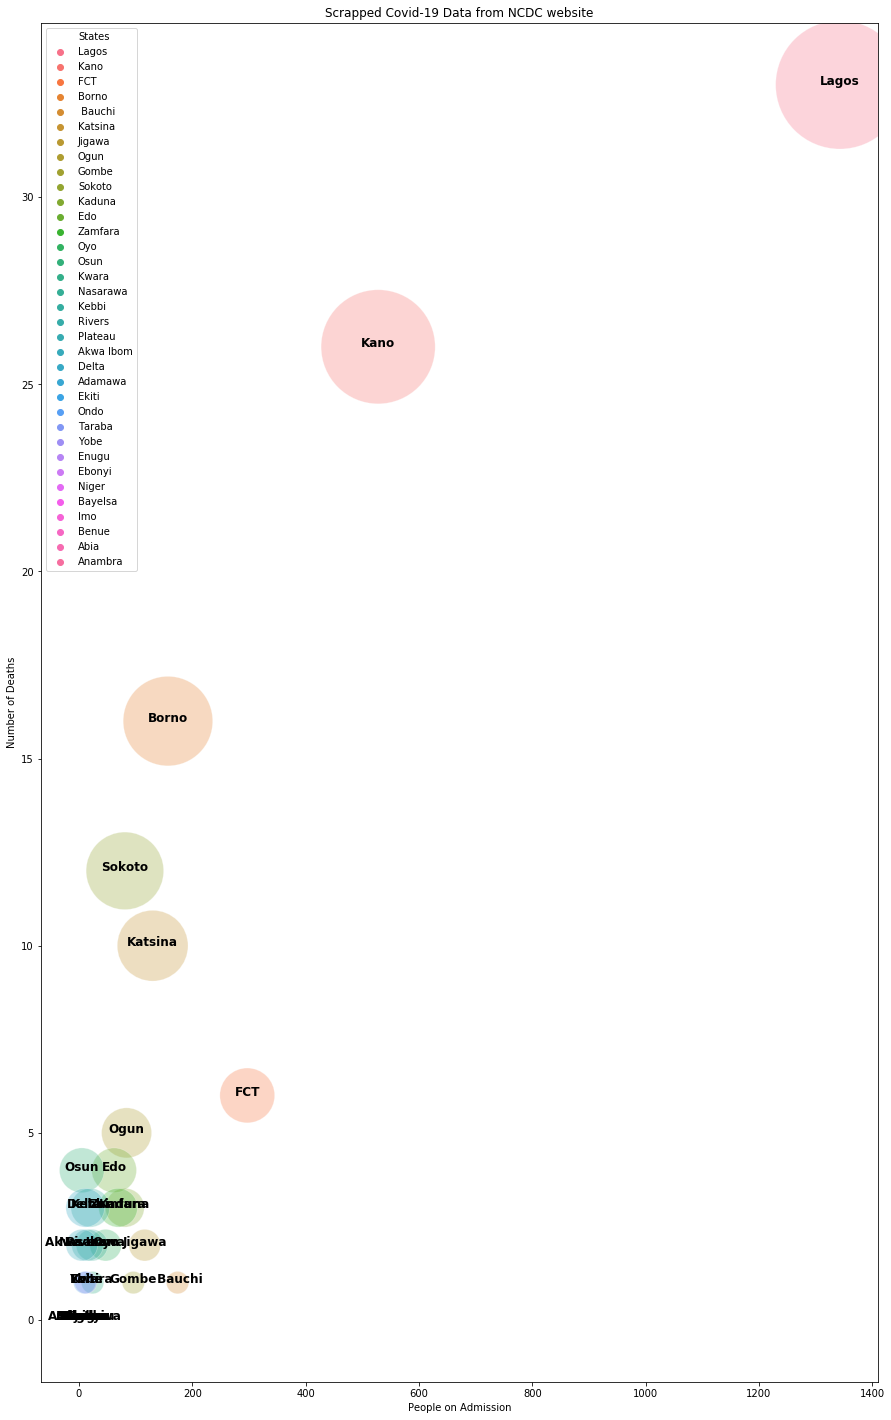

In [3]:
import seaborn as sns

plt.figure(figsize=(15,25))
plt.title("Scrapped Covid-19 Data from NCDC website")
ax = sns.scatterplot(cf['People on Admission'], cf['Number of Deaths'], hue=cf['States'], alpha=0.3, s=cf['Number of Deaths']*500)

for line in range(0,df.shape[0]):
     ax.text(cf['People on Admission'][line], cf['Number of Deaths'][line], cf['States'][line], horizontalalignment='center', size='large', color='black', weight='semibold')

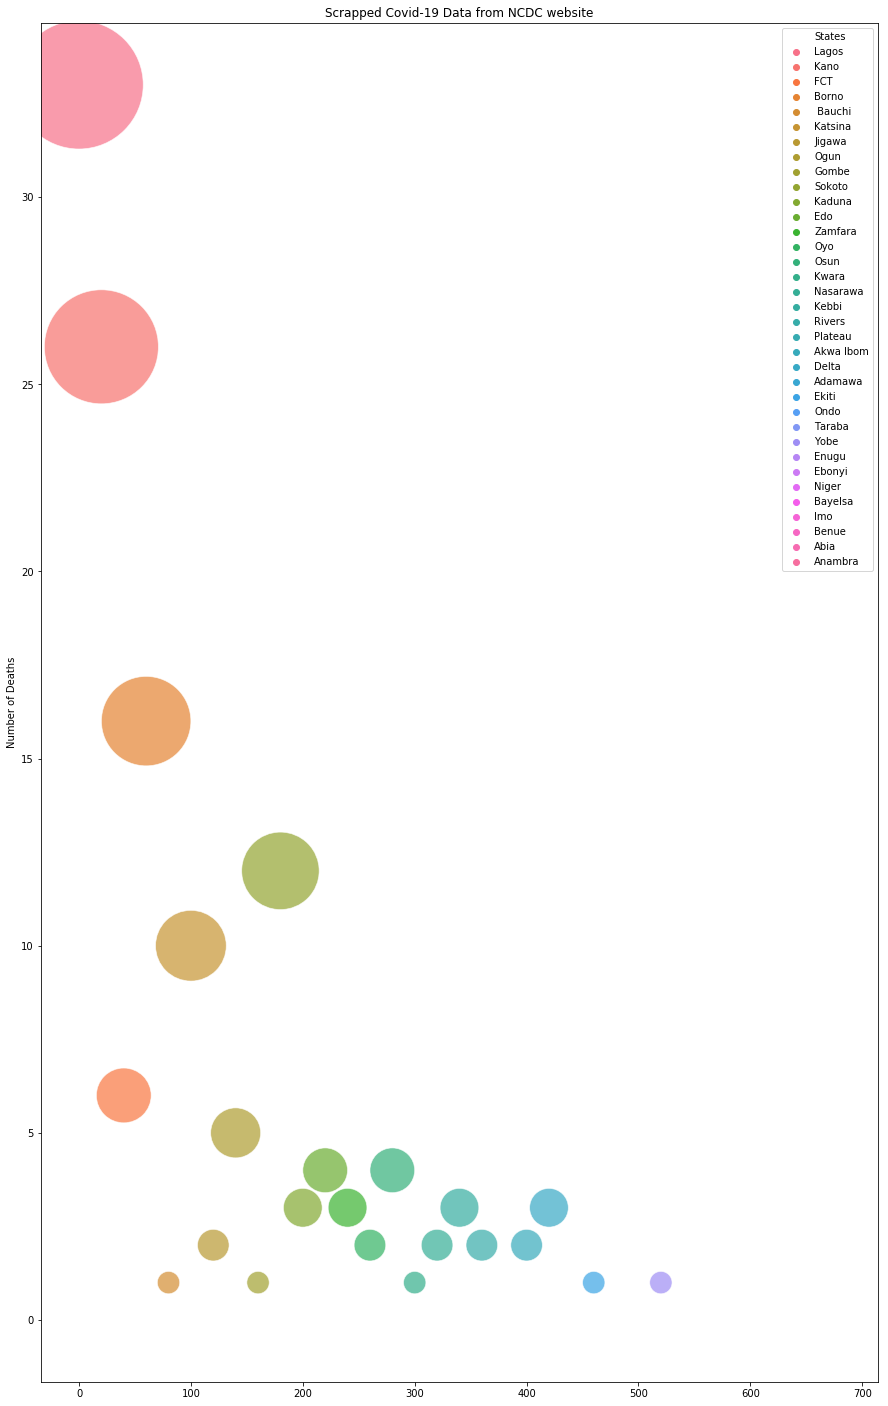

In [4]:
import seaborn as sns

plt.figure(figsize=(15,25))
plt.title("Scrapped Covid-19 Data from NCDC website")
ax = sns.scatterplot(cf.index*20, cf['Number of Deaths'], hue=cf['States'], alpha=0.7, s=cf['Number of Deaths']*500)

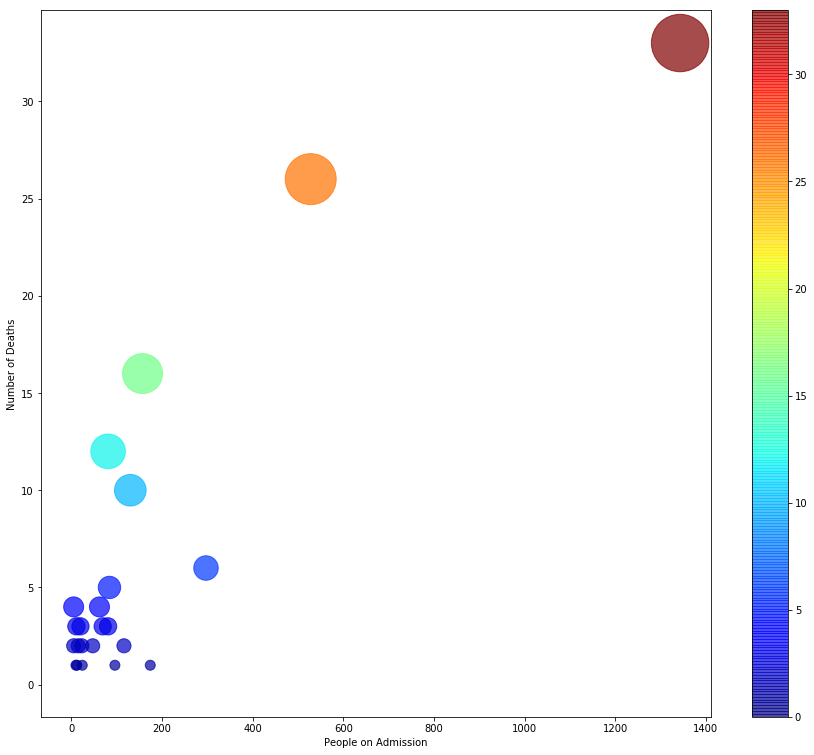

In [5]:
cf.plot(kind='scatter', x='People on Admission', y='Number of Deaths', alpha=0.7, figsize=(15,13),s=cf['Number of Deaths']*100, c=cf['Number of Deaths'], cmap=plt.get_cmap('jet'), colorbar=True)

plt.show()